<a href="https://colab.research.google.com/github/ikypakey/PCVK/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content.drive')

Mounted at /content.drive


In [68]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Dilasi Tanpa Library

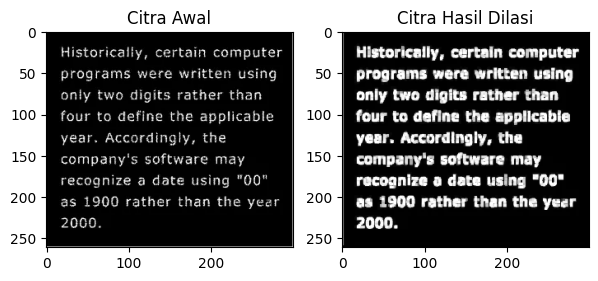

In [20]:
# Input image
input_image = cv2.imread('/content/drive/MyDrive/img/morphology.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Membuat structured element berbentuk cr 3x3
sed = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

def morph_dilate(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    dilate_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for i in range(0,rows-(kernel.shape[0]-1)):
        for j in range(0,cols-kernel.shape[0]-1):
            dilate_img[i,j]=np.max(se * newimg[i:i+kernel.shape[0],j:j+kernel.shape[0]])

    return dilate_img

# Citra hasil dilasi
output_image = morph_dilate(input_image, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(7,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Dilasi")
axs[1].imshow(output_image, cmap='gray')

4. Dilasi Dengan Library + Cetak Strel

[[0 1 0]
 [1 1 1]
 [0 1 0]]


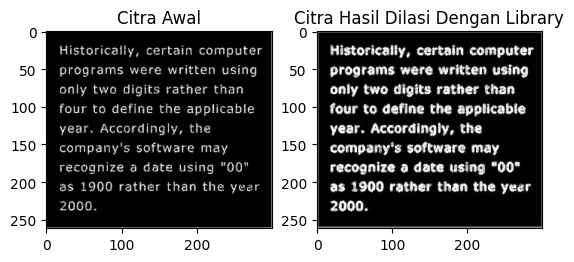

In [19]:

# Dilasi dengan library opencv

# Input image
input_image = cv2.imread('/content/drive/MyDrive/img/morphology.png')

# Membuat structured element berbentuk cr 3x3
cr = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
print(cr)
# Hasil dilasi menggunakan library opencv dilate()
output_image = cv2.dilate(input_image, cr)

# Membuat figure
fig, axs = plt.subplots(1, 2)

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image)

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Dilasi Dengan Library")
axs[1].imshow(output_image)

5. Fungsi Erosi tanpa Library

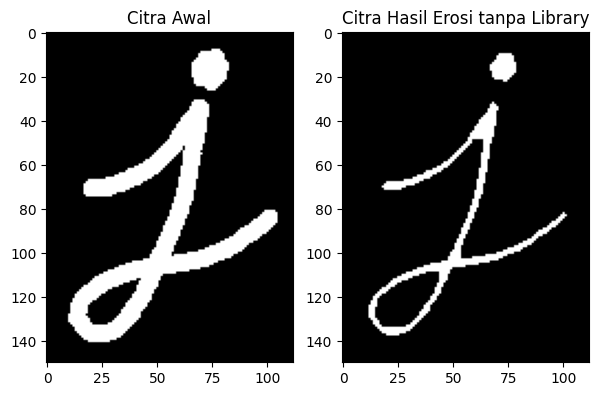

In [24]:
# Erosi tanpa library

# Input image
input_image = cv2.imread('/content/drive/MyDrive/img/j.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Membuat structured element berbentuk square 5x5
sq = np.ones((5,5))

def morph_erode(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    erode_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for i in range(0,rows-(kernel.shape[0]-1)):
        for j in range(0,cols-(kernel.shape[0]-1)):
            erode_img[i,j]=np.min(sq * newimg[i:i+kernel.shape[0],j:j+kernel.shape[0]])
    return erode_img

# Citra hasil erosi
output_image = morph_erode(input_image, sq)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(7,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi tanpa Library")
axs[1].imshow(output_image, cmap='gray')

6. Erosi dengan Library

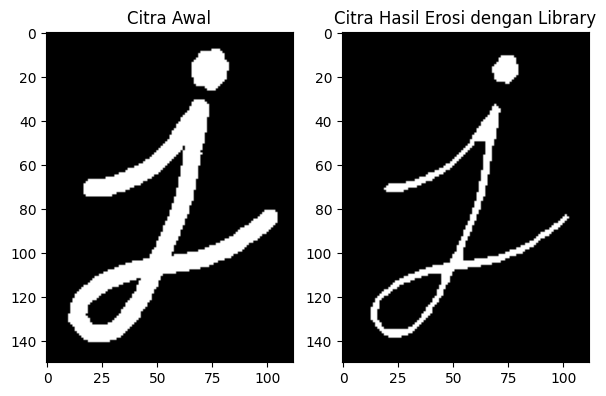

In [26]:
# Input 
input_image = cv2.imread('/content/drive/MyDrive/img/j.png')

# Membuat structured element berbentuk square 5x5
sq = np.ones((5,5))

# Hasil erosi menggunakan library opencv erode()
output_image = cv2.erode(input_image, sq)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(7,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image)

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi dengan Library")
axs[1].imshow(output_image)

7. Opening tanpa dan dengan library

Tanpa Library

<ipython-input-69-76bbeea03837>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(opn7, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

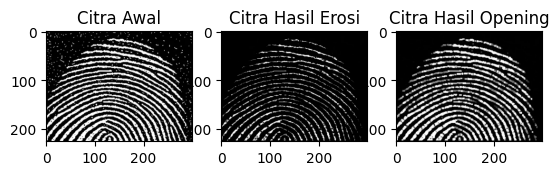

In [69]:
# Membaca image untuk operasi erosi
opn7 = cv.imread('/content/drive/MyDrive/img/fingerprint.png', 0)

#Acquire size of the image
m, n = opn7.shape

#Show the image
plt.imshow(opn7, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = opn7[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#Read the image for dilation
opn7_2 = imgErode

#Acquire size of the image
p, q= opn7_2.shape

#Show the image
plt.imshow(opn7_2, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1], [1,1,1], [1,1,1]])
constant1 = 1

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = opn7_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(opn7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Opening')

Dengan Library

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

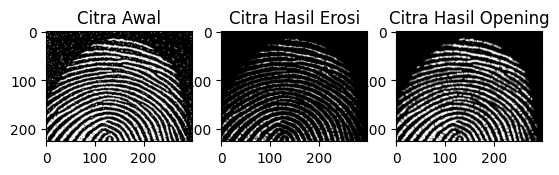

In [71]:
opn7lib= cv.imread('/content/drive/MyDrive/img/fingerprint.png', 0)

kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(opn7lib, cv.MORPH_OPEN, kernel)
erosion = cv.erode(opn7lib, kernel, iterations = 1)

plt.subplot(131), plt.imshow(opn7lib, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Opening')

8. Closing tanpa dan dengan library

<ipython-input-75-a16e70c4ae75>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(clos8, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

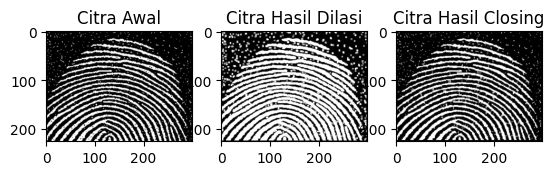

In [75]:
# Membaca image untuk operasi erosi
clos8 = cv2.imread('/content/drive/MyDrive/img/fingerprint.png', 0)

#get size of the image
m, n= clos8.shape

#Show the image
plt.imshow(clos8, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((m,n), dtype=np.uint8)

#Define the structuring element 
k=3
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, m-constant1):
  for j in range(constant1,n-constant1):
    temp = clos8[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

#Read the image for dilation
clos8_2 = imgDilate

#Acquire size of the image
m, n = clos8_2.shape

#Show the image
plt.imshow(opn8_2, cmap="gray")

# Define the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): 
  for j in range(constant,n-constant):
    temp = clos8_2[i-constant:i+constant+1, j-constant:j+constant+1] 
    product = temp * SE
    imgErode[i,j] = np.min(product)

plt.subplot(131),plt.imshow(clos8, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(133),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Closing')

Dengan Library

(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

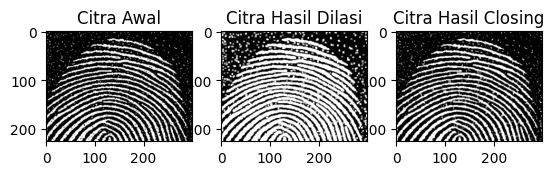

In [77]:
lib = np.ones((3,3), np.uint8)
dilation = cv.morphologyEx(clos8, cv.MORPH_DILATE, lib)
closing = cv.morphologyEx(clos8, cv.MORPH_CLOSE, lib)

plt.subplot(131), plt.imshow(clos8, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilation, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(closing, cmap="gray"), plt.title('Citra Hasil Closing')

9. Dilasi dengan Structuring Element berbentuk Cross 3 x 3  dan 5 x 5

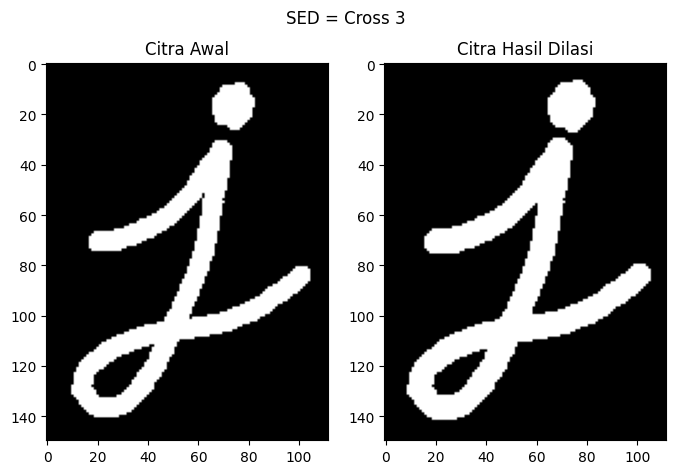

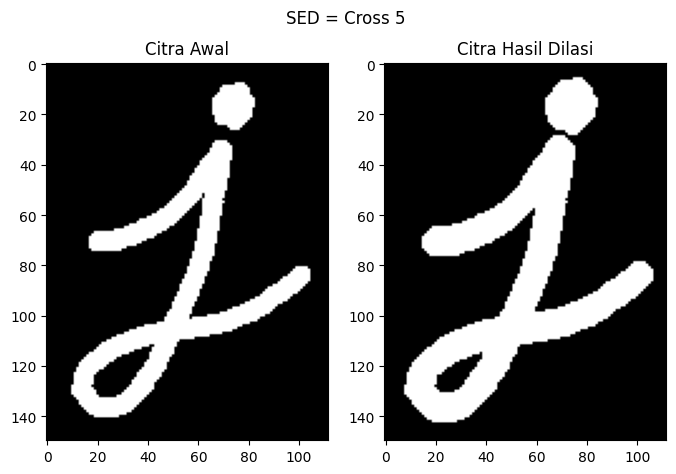

In [42]:
# Input image
input_image = cv2.imread('/content/drive/MyDrive/img/j.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Membuat structured element berbentuk cross 3x3
cr3 = np.array([[0.,1.,0.],
                    [1.,1.,1.],
                    [0.,1.,0.]], dtype=np.uint8)

# Membuat structured element berbentuk cross 5x5
cr5 = np.array([[0.,0.,1.,0.,0.],
                    [0.,0.,1.,0.,0.],
                    [1.,1.,1.,1.,1.],
                    [0.,0.,1.,0.,0.],
                    [0.,0.,1.,0.,0.]], dtype=np.uint8)

# Hasil dilasi menggunakan structured element cross 3x3
output_image = cv2.dilate(input_image, cr3)

# Hasil dilasi menggunakan structured element cross 5x5
dilate_image = cv2.dilate(input_image, cr5)

# Membuat figure hasil dilasi menggunakan structured element cross 3x3
fig, axs = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle('SED = Cross 3')
# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil dilasi menggunakan structured element cross 3x3
axs[1].set_title("Citra Hasil Dilasi")
axs[1].imshow(output_image, cmap='gray')

# Membuat figure hasil dilasi menggunakan structured element cross 5x5
fig1, axs1 = plt.subplots(1, 2, figsize=(8,5))
fig1.suptitle('SED = Cross 5')
# Menampilkan citra awal
axs1[0].set_title("Citra Awal")
axs1[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil dilasi menggunakan structured element cross 5x5
axs1[1].set_title("Citra Hasil Dilasi")
axs1[1].imshow(dilate_image, cmap='gray')

10. Dilasi dengan Structuring Element berbentuk Circular 3 x 3  dan 5 x 5

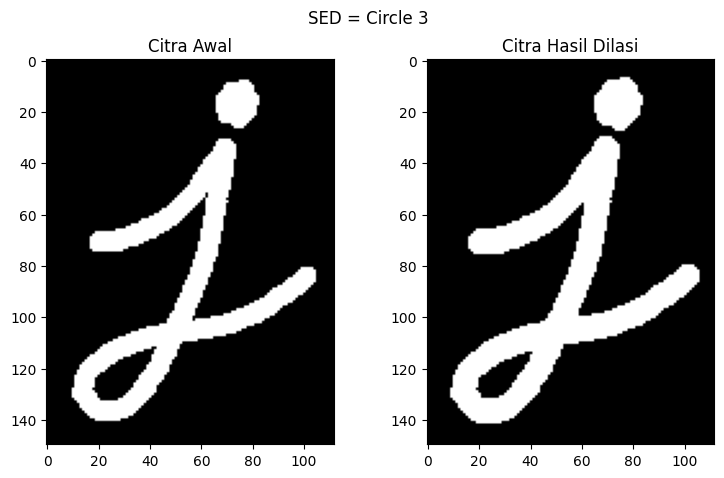

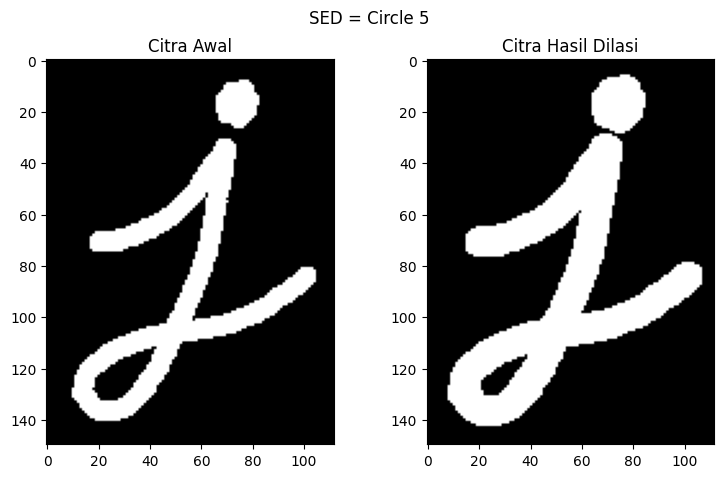

In [43]:
# Input image
input_image = cv2.imread('/content/drive/MyDrive/img/j.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Membuat structured element berbentuk circular 3x3
cir3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

# Membuat structured element berbentuk circular 5x5
cir5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

# Hasil dilasi menggunakan structured element circular 3x3
output_image = cv2.dilate(input_image, cir3)

# Hasil dilasi menggunakan structured element circular 5x5
dilate_image = cv2.dilate(input_image, cir5)

# Membuat figure hasil dilasi menggunakan structured element circular 3x3
fig, axs = plt.subplots(1, 2, figsize=(9,5))
fig.suptitle('SED = Circle 3')
# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil dilasi menggunakan structured element circular 3x3
axs[1].set_title("Citra Hasil Dilasi")
axs[1].imshow(output_image, cmap='gray')

# Membuat figure hasil dilasi menggunakan structured element circular 5x5
fig1, axs1 = plt.subplots(1, 2, figsize=(9,5))
fig1.suptitle('SED = Circle 5')
# Menampilkan citra awal
axs1[0].set_title("Citra Awal")
axs1[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil dilasi menggunakan structured element circular 5x5
axs1[1].set_title("Citra Hasil Dilasi")
axs1[1].imshow(dilate_image, cmap='gray')

11. Erosi dengan Structuring Element berbentuk Rectangle 3 x 5  dan 5 x 7

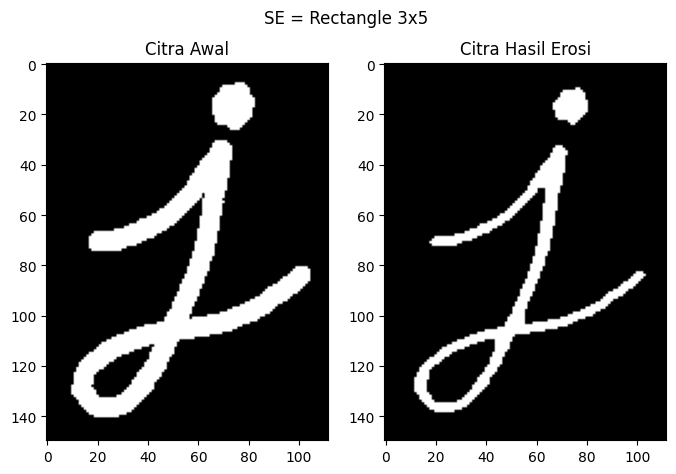

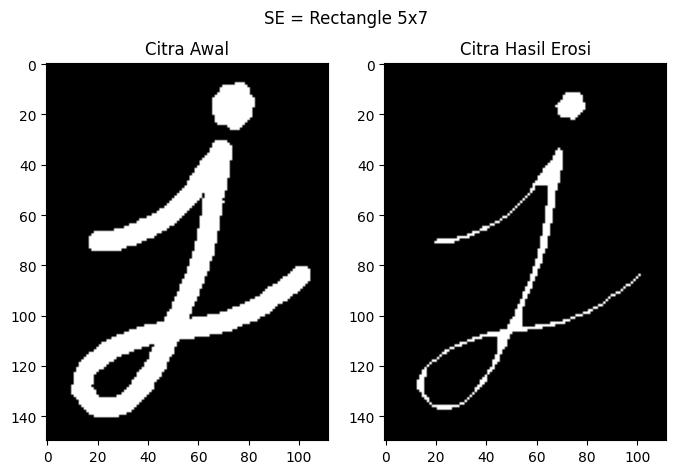

In [47]:
# Input image
input_image = cv2.imread('/content/drive/MyDrive/img/j.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Membuat structured element berbentuk Rectangle 3 x 5
rec3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))

# Membuat structured element berbentuk Rectangle 5 x 7
rec5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7))

# Hasil erosi menggunakan structured element Rectangle 3 x 5
output_image = cv2.erode(input_image, rec3)

# Hasil erosi menggunakan structured element Rectangle 5 x 7
erode_image = cv2.erode(input_image, rec5)

# Membuat figure hasil erosi menggunakan structured element Rectangle 3 x 5
fig, axs = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle('SE = Rectangle 3x5')
# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil erosi menggunakan structured element Rectangle 3 x 5
axs[1].set_title("Citra Hasil Erosi")
axs[1].imshow(output_image, cmap='gray')

# Membuat figure hasil erosi menggunakan structured element Rectangle 5 x 7
fig1, axs1 = plt.subplots(1, 2, figsize=(8,5))
fig1.suptitle('SE = Rectangle 5x7')
# Menampilkan citra awal
axs1[0].set_title("Citra Awal")
axs1[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil erosi menggunakan structured element Rectangle 5 x 7
axs1[1].set_title("Citra Hasil Erosi")
axs1[1].imshow(erode_image, cmap='gray')

12. Erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

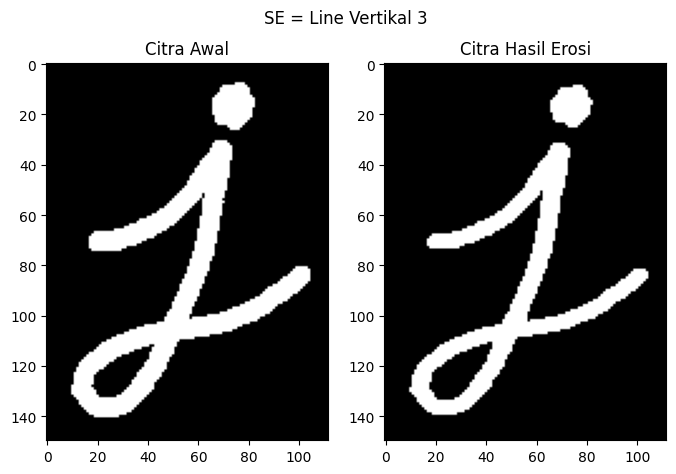

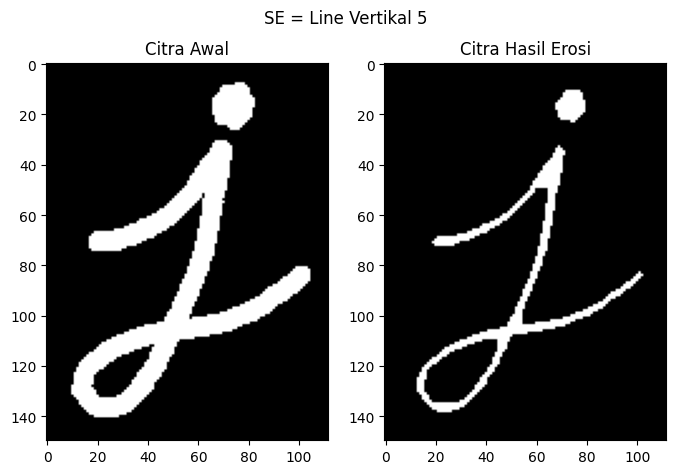

In [49]:
# Input image
input_image = cv2.imread('/content/drive/MyDrive/img/j.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Membuat structured element berbentuk Line Vertikal 3
ver3 = np.array([[1.],
                    [1.],
                    [1.]], dtype=np.uint8)

# Membuat structured element berbentuk Line Vertikal 5
ver5 = np.ones((5,5))

# Hasil erosi menggunakan structured element Line Vertikal 3
output_image = cv2.erode(input_image, ver3)

# Hasil erosi menggunakan structured element Line Vertikal 5
erode_image = cv2.erode(input_image, ver5)

# Membuat figure hasil erosi menggunakan structured element Line Vertikal 3
fig, axs = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle('SE = Line Vertikal 3')
# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil erosi menggunakan structured element Line Vertikal 5
axs[1].set_title("Citra Hasil Erosi")
axs[1].imshow(output_image, cmap='gray')

# Membuat figure hasil erosi menggunakan structured element Line Vertikal 5
fig1, axs1 = plt.subplots(1, 2, figsize=(8,5))
fig1.suptitle('SE = Line Vertikal 5')
# Menampilkan citra awal
axs1[0].set_title("Citra Awal")
axs1[0].imshow(input_image, cmap='gray')

# Menampilkan citra hasil erosi menggunakan structured element Line Vertikal 5
axs1[1].set_title("Citra Hasil Erosi")
axs1[1].imshow(erode_image, cmap='gray')